In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
# import seaborn as sns

from matplotlib import rc
plt.rc('text', usetex=True)

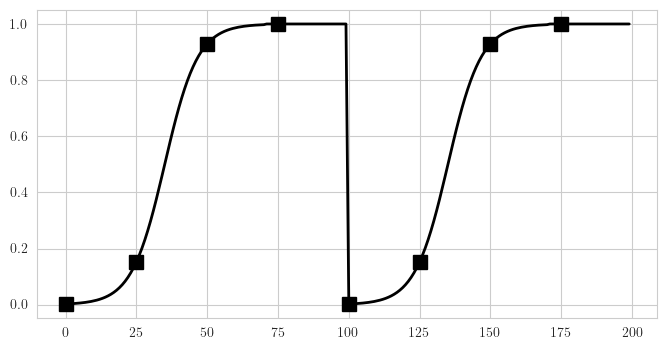

0.013576916943744367

In [14]:



def frange_cycle_linear(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch / n_cycle
    step = (stop - start) / (period * ratio)  # linear schedule

    for c in range(n_cycle):

        v, i = start, 0
        while v <= stop and (int(i + c * period) < n_epoch):
            L[int(i + c * period)] = v
            v += step
            i += 1
    return L


def frange_cycle_sigmoid(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch / n_cycle
    step = (stop - start) / (period * ratio)  # step is in [0,1]

    # transform into [-6, 6] for plots: v*12.-6.

    for c in range(n_cycle):

        v, i = start, 0
        while v <= stop:
            L[int(i + c * period)] = 1.0 / (1.0 + np.exp(- (v * 12. - 6.)))
            v += step
            i += 1
    return L


#  function  = 1 − cos(a), where a scans from 0 to pi/2

def frange_cycle_cosine(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch / n_cycle
    step = (stop - start) / (period * ratio)  # step is in [0,1]

    # transform into [0, pi] for plots:

    for c in range(n_cycle):

        v, i = start, 0
        while v <= stop:
            L[int(i + c * period)] = 0.5 - .5 * math.cos(v * math.pi)
            v += step
            i += 1
    return L


def frange(start, stop, step, n_epoch):
    L = np.ones(n_epoch)
    v, i = start, 0
    while v <= stop:
        L[i] = v
        v += step
        i += 1
    return L


n_epoch = 200

beta_np_cyc = frange_cycle_sigmoid(start=0.0, stop=1, n_epoch=200, n_cycle=2, ratio=0.7)

fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epoch / 8), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.show()
beta_np_cyc[10]